In [1]:
# import data and store in arrays

import csv

noga_str = './data/data_no_ga.csv'
ga_str = './data/data_ga.csv'

noga_file = open(noga_str)
csv_noga = csv.reader(noga_file)
ga_file = open(ga_str)
csv_ga = csv.reader(ga_file)

noga = []

for row in csv_noga:
    if (row[0] != ' '):
        noga.insert(len(noga), [row[0], row[3]])
        
noga = noga[1:len(noga)]
        
ga = []

for row in csv_ga:
    if (row[0] != ' '):
        ga.insert(len(ga), [row[0], row[3]])
        
ga = ga[1:len(ga)]

In [2]:
# put data into separate arrays for each subject

noga_data = [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9'], ['10'], ['11']]

for i in range(0, len(noga_data)):
    for j in range(0, len(noga)):
        if (noga_data[i][0] == noga[j][0]):
            noga_data[i].insert(len(noga_data[i]), int(noga[j][1]))
            
ga_data = [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9'], ['10'], ['11']]

for i in range(0, len(ga_data)):
    for j in range(0, len(ga)):
        if (ga_data[i][0] == ga[j][0]):
            ga_data[i].insert(len(ga_data[i]), int(ga[j][1]))

In [3]:
# ANOVA
#
# ANOVA is a form of statistical hypothesis testing heavily used in the analysis of experimental data.
# A test result (calculated from the null hypothesis and the sample) is called statistically significant
# if it is deemed unlikely to have occurred by chance, assuming the truth of the null hypothesis.
# A statistically significant result, when a probability (p-value) is less than a pre-specified threshold
# (significance level), justifies the rejection of the null hypothesis, but only if the a priori probability
# of the null hypothesis is not high.
#
# In the typical application of ANOVA, the null hypothesis is that all groups are random samples from the same population.
#
# The fixed-effects model (class I) of analysis of variance applies to situations in which the experimenter
# applies one or more treatments to the subjects of the experiment to see whether the response variable values
# change. This allows the experimenter to estimate the ranges of response variable values that the treatment would
# generate in the population as a whole.
#
# (Wikipedia)

from scipy import stats
 
alpha = 0.05 # significance level
F, p = stats.f_oneway(noga_data[0][1:len(noga_data[0])], ga_data[0][1:len(ga_data[0])-1])

print('p', p)
print('alpha', alpha)

if (p <= alpha):
    print('P-value ≤ α: The differences between some of the means are statistically significant')
elif (p > alpha):
    print('P-value > α: The differences between the means are not statistically significant')
      
# It is unlikely that the results have occurred by chance.

p 8.597882560241366e-40
alpha 0.05
P-value ≤ α: The differences between some of the means are statistically significant


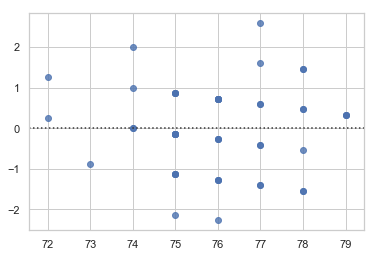

In [29]:
# If your entire model is statistically significant, that's great news!
# However, be sure to check the residual plots so you can trust the results!

import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

x = noga_data[0][1:len(noga_data[0])]
y = ga_data[0][1:len(ga_data[0])-1]

# Plot the residuals after fitting a linear model
sns.residplot(x, y)

In [40]:
# Paired T-test

# The paired sample t-test, sometimes called the dependent sample t-test, is a statistical procedure
# used to determine whether the mean difference between two sets of observations is zero. In a paired
# sample t-test, each subject or entity is measured twice, resulting in pairs of observations. Common
# applications of the paired sample t-test include case-control studies or repeated-measures designs.
# Suppose you are interested in evaluating the effectiveness of a company training program. One approach
# you might consider would be to measure the performance of a sample of employees before and after
# completing the program, and analyze the differences using a paired sample t-test.
# https://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/

import statistics as st
import scipy.stats as stats

x = noga_data[0][1:len(noga_data[0])]
y = ga_data[0][1:len(ga_data[0])-1]
difference = []

for i in range (0, len(x)):
    difference.append(x[i] - y[i])
    
mean = st.mean(difference)
stdev = st.stdev(difference)
pairedt, pvalue = stats.ttest_rel(x, y)

print('mean', mean)
print('stdev', stdev)
print('pvalue', pvalue)

if (pvalue <= alpha):
    print('P-value ≤ α: The differences between some of the means are statistically significant')
elif (pvalue > alpha):
    print('P-value > α: The differences between the means are not statistically significant')
    
# The difference between the values before and the values after the experiment is carried out are statistically significant.

mean 5.679245283018868
stdev 1.7516320401453784
pvalue 1.8782525897929326e-29
P-value ≤ α: The differences between some of the means are statistically significant


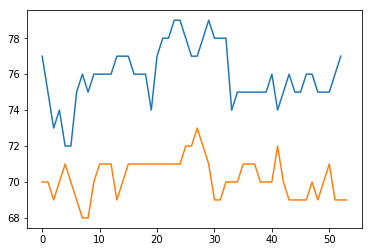

In [7]:
# Graphs

from scipy import stats
import matplotlib.pyplot as plt

plt.plot(noga_data[0][1:len(noga_data[0])])
plt.plot(ga_data[0][1:len(ga_data[0])])
plt.show()